In [152]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
# Fitness data
df = pd.read_csv('test.csv')
df.columns = ["Algorithm", "Generation", "Value"]

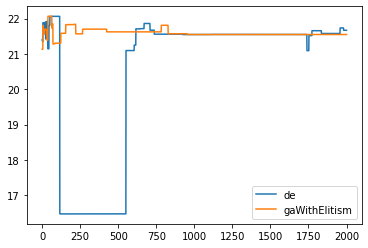

In [154]:
# Fitness plot
for name, group in df.groupby("Algorithm"):
    plt.plot(group["Generation"], group["Value"], label=name)
    #group.plot(x="Generation", y="Value", kind="line", title=name, legend=True)
plt.legend()
plt.show()

In [155]:
# Sinusfunktion
from math import pi, sin

def sinus(A: float, f: float, t: float, phi: float, D: float) -> float:
    return A * sin(2 * pi * f * t + phi) + D

<AxesSubplot:title={'center':'AccAbs'}, xlabel='Time'>

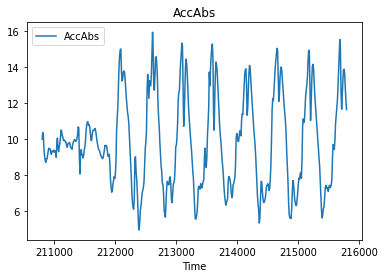

In [156]:
# Input from sensordata.csv
sensordata = pd.read_csv('sensordata.csv', sep=";", decimal=",", skiprows=1, nrows=500)
sensordata.columns = ["Time", "AccX", "AccY", "AccZ", "AccAbs"]
sensordata.plot(x="Time", y="AccAbs", kind="line", title="AccAbs", legend=True)

In [157]:
genomes = pd.read_csv('bestGenomes.csv', header=None)
genomes.columns = ["Algorithm", "A", "f", "phi", "D", "Error"]

In [158]:
def plotSinus(A: float, f: float, phi: float, D: float, algorithm: str, error: float):
    t = sensordata["Time"].values
    y = []
    for i in t:
        y.append(sinus(A, f, i, phi, D))
    plt.plot(t, y, label="{} (Error: {})".format(algorithm, error))
    #plt.ylim(6,16)

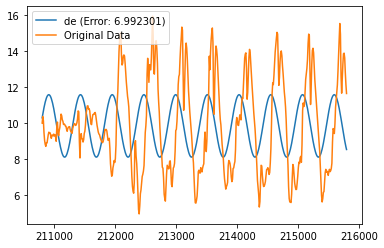

In [159]:
for index, row in genomes.iterrows():
    if(row["Algorithm"] == "de"):
        plotSinus(row["A"], row["f"], row["phi"], row["D"], row["Algorithm"], row["Error"])
plt.plot(sensordata["Time"], sensordata["AccAbs"], label="Original Data")
plt.legend()
plt.show()